## Import Modules

In [1]:
!nvidia-smi

Tue Sep 12 11:32:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

## Data

In [4]:
os.listdir(path='/kaggle/input/speech-emotion-recognition-en/Crema')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = '/kaggle/input/speech-emotion-recognition-en/Crema'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

7442

### Get the Raw Text from Audio Files

In [5]:
! pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 11.4 MB/s eta 0:00:0000:0100:01


In [6]:
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

the service
error
I think I've seen this before
I wonder what this is about
that is exactly what happened
error
it's 11:00
that is exactly what happened
the airplane is almost full
error
don't forget a jacket
will stop in a couple of minutes
I'm on my way to the meeting
it's 11:00
it's 11:00
the surface is slick
that is exactly what happened
the airplane is almost full
that is exactly what happened
I wonder what this is about
maybe tomorrow it will be cold
error
error
don't forget a jacket
I think I have a doctor's appointment
that is exactly what happened
I think I seen this before
the surface is slick
is 11:00
I think I've seen this before
maybe tomorrow it will be cold
stop in a couple of minutes
don't forget a jacket
I wonder what this is about
error
the surface is slick
I wonder what this is about
the airplane is almost full
I would like a new alarm clock
maybe tomorrow it will be cold
turn on my way to the meeting
that is exactly what happened
I'm on my way to the meeting
it's 11

#### Visualization

In [ ]:
#Plotting the Basic Graphs for understanding of Audio Files 
'''import librosa as lr
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (sec)' , ylabel = 'Sound Amplitude')
    plt.show()
    '''

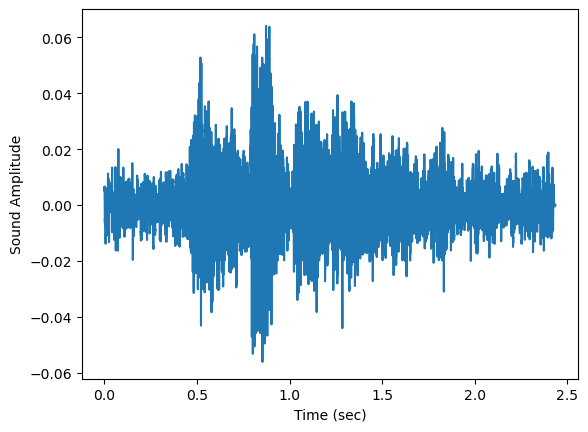

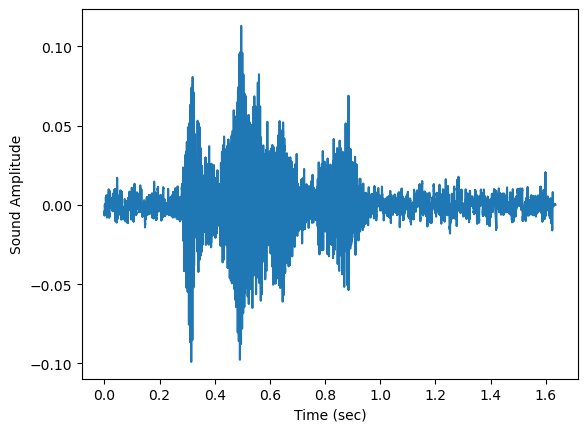

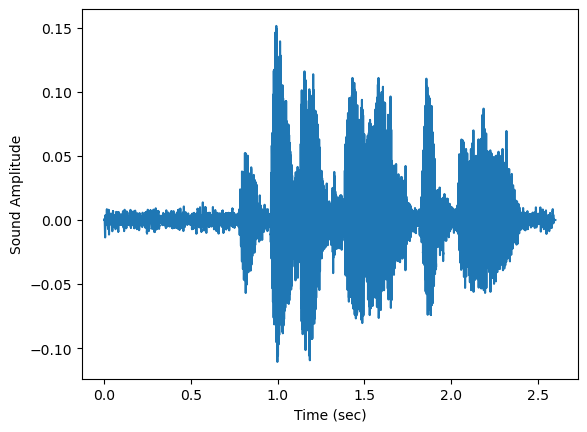

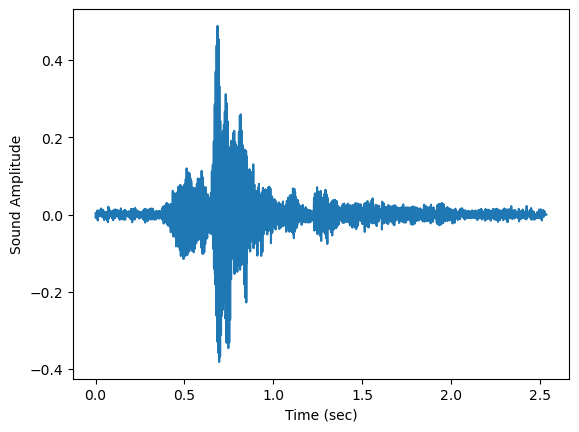

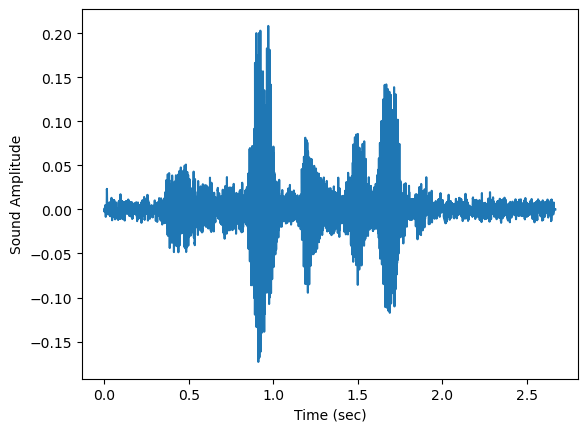

In [7]:
# Plotting the Basic Graphs for understanding of Audio Files 
import librosa as lr

# Assuming listOfFiles contains your file paths
count = 0  # Initialize a counter
for file in listOfFiles:
    if count >= 5:
        break  # Exit the loop after plotting the first 5 files
    audio, sfreq = lr.load(file)
    time = np.arange(0, len(audio)) / sfreq
    
    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time (sec)', ylabel='Sound Amplitude')
    plt.show()
    
    count += 1  # Increment the counter

In [ ]:
#PLOT THE SEPCTOGRAM
'''for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency (Hz)')
     plt.xlabel('Time (sec)')
     plt.show()
     '''

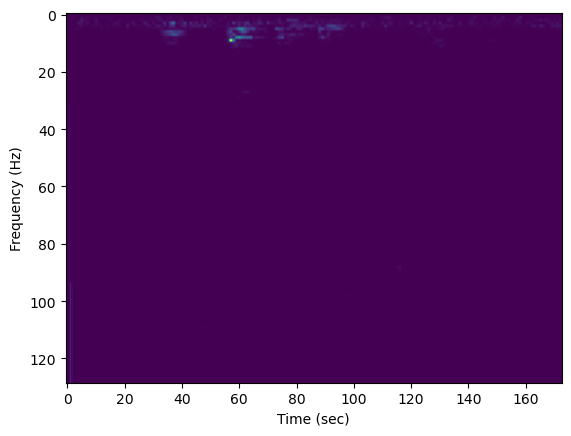

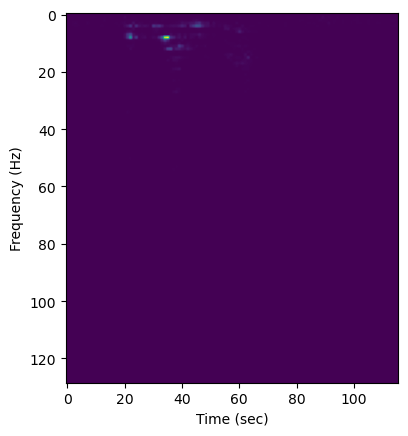

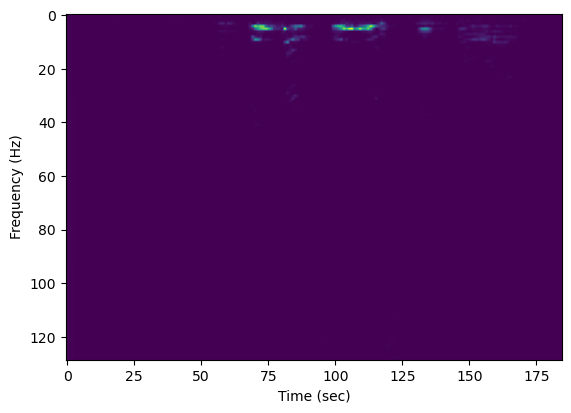

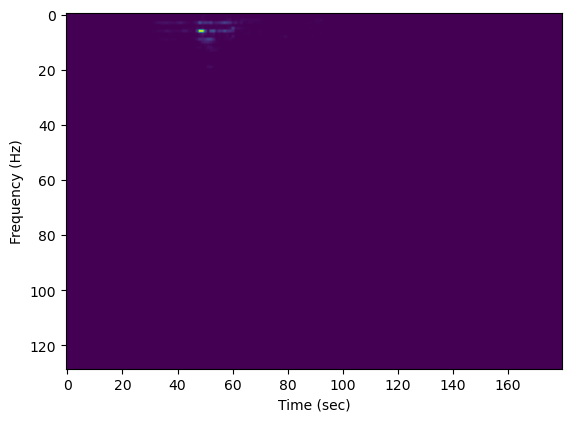

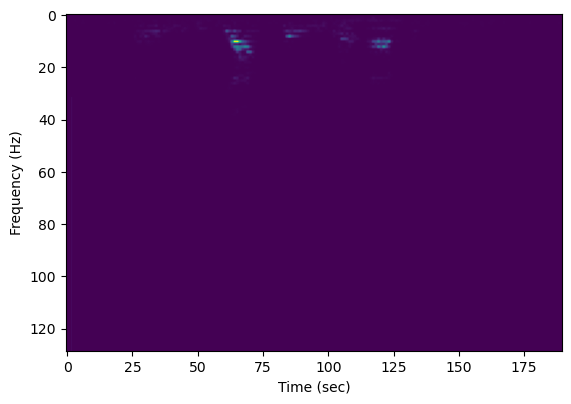

In [8]:
from scipy.io import wavfile as wav
from scipy import signal

# Assuming listOfFiles contains your file paths
count = 0  # Initialize a counter
for file in listOfFiles:
    if count >= 5:
        break  # Exit the loop after plotting the first 5 files

    sample_rate, samples = wav.read(file)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) 
    plt.pcolormesh(times, frequencies, spectrogram)
    plt.imshow(spectrogram)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (sec)')
    plt.show()

    count += 1  # Increment the counter


In [9]:
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

In [10]:
! pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5889 sha256=5ceb5dcba8862287510073a8ce3c6b84f73b9819a2a00e9b2066bf6962caa1da
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
from scipy.fftpack import fft
from scipy.signal import hilbert
from python_speech_features import mfcc, logfbank

for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

### Data Cleaning

In [12]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [13]:
import glob, pickle
from tqdm import tqdm

# Define the output directory
output_dir = 'clean_speech//'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for file in tqdm(glob.glob(r'/kaggle/input/speech-emotion-recognition-en/Crema//*.wav')):
    file_name = os.path.basename(file)
    signal, rate = librosa.load(file, sr=16000)
    mask = envelope(signal, rate, 0.0005)
    # Create the full output file path
    output_file = os.path.join(output_dir, file_name)
    wav.write(filename=output_file, rate=rate, data=signal[mask])


100%|██████████| 7442/7442 [02:24<00:00, 51.53it/s]


## Feature Extraction

In [35]:
import soundfile

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

#### Labels Classification

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised',
  'NEU':'neutral',
  'HAP':'happy',
  'SAD':'sad',
  'ANG':'angry',
  'FEA':'fearful',
  'DIS':'disgust',
  'n':'neutral',
  'h':'happy',
  'sa':'sad',
  'a':'angry',
  'f':'fearful',
  'd':'disgust',
  'su':'surprised',
  'Sad':'sad',
  'Fear':'fearful',
  'Pleasant_surprise':'surprised',
  'pleasant_surprise':'surprised',
  'su':'surprised',
       
}

observed_emotions=['calm', 'happy', 'fearful', 'angry']

In [36]:
emotions={
  'NEU':'neutral',
  'HAP':'happy',
  'SAD':'sad',
  'ANG':'angry',
  'FEA':'fearful',
  'DIS':'disgust',
       
}

observed_emotions=[ 'happy', 'fearful', 'angry']

In [41]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [42]:
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in tqdm(glob.glob(r'/kaggle/working/clean_speech//*.wav')):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("_")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [44]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_train),np.shape(y_test))
y_test_map = np.array(y_test).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_train).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
#print(*test_filename,sep="\n")

100%|██████████| 7442/7442 [02:23<00:00, 52.01it/s]


(2859, 180) (954, 180) (2859, 2) (954, 2)
(2859,) (954,)


In [45]:
print((x_train[0], x_test[0]))

(array([-3.28007477e+02,  8.52532578e+01,  3.38114853e+01,  2.31145611e+01,
       -3.80638647e+00, -5.49482250e+00, -1.86716366e+00, -1.14840698e+01,
       -3.14801264e+00, -9.52013683e+00, -3.74112582e+00, -1.24551272e+00,
       -3.71681404e+00, -2.88353467e+00, -2.44376993e+00, -2.39645886e+00,
       -3.16268492e+00, -3.53350306e+00, -5.48104048e+00, -2.72396326e+00,
       -6.79882336e+00, -7.09454060e-01, -9.14641678e-01, -2.22039104e+00,
       -1.00930142e+00, -2.58825612e+00, -1.63710272e+00, -9.59613323e-02,
       -9.77296054e-01, -1.55966473e+00, -2.87209606e+00, -1.98527932e+00,
        3.07125950e+00,  2.07193422e+00,  3.03602362e+00,  3.48419905e+00,
        2.43370485e+00, -3.32834870e-01, -3.39606285e+00, -3.91601872e+00,
        6.40591919e-01,  6.66152358e-01,  5.56559563e-01,  5.02981544e-01,
        5.46023250e-01,  6.19284332e-01,  6.90048635e-01,  6.86799049e-01,
        6.72670186e-01,  6.93891644e-01,  6.85497761e-01,  6.15888238e-01,
        2.82382825e-03, 

In [46]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## Classifier and Model Training

In [48]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=50)

In [49]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=50)

In [50]:
Pkl_Filename = "Speech_Emotion_Detection_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [51]:
with open(Pkl_Filename, 'rb') as file:  
    Speech_Emotion_Detection_Model = pickle.load(file)

Speech_Emotion_Detection_Model

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=50)

In [52]:
y_pred=Speech_Emotion_Detection_Model.predict(x_test)
y_pred

array(['fearful', 'fearful', 'fearful', 'fearful', 'happy', 'fearful',
       'fearful', 'happy', 'fearful', 'happy', 'fearful', 'fearful',
       'happy', 'happy', 'fearful', 'fearful', 'fearful', 'happy',
       'fearful', 'happy', 'angry', 'happy', 'happy', 'angry', 'happy',
       'angry', 'happy', 'happy', 'angry', 'angry', 'happy', 'angry',
       'fearful', 'happy', 'fearful', 'fearful', 'happy', 'happy',
       'happy', 'fearful', 'happy', 'angry', 'fearful', 'fearful',
       'fearful', 'angry', 'happy', 'angry', 'fearful', 'angry', 'angry',
       'fearful', 'fearful', 'fearful', 'happy', 'fearful', 'angry',
       'angry', 'angry', 'fearful', 'happy', 'happy', 'happy', 'happy',
       'happy', 'fearful', 'happy', 'fearful', 'angry', 'fearful',
       'fearful', 'fearful', 'angry', 'happy', 'happy', 'fearful',
       'happy', 'happy', 'fearful', 'fearful', 'fearful', 'angry',
       'angry', 'angry', 'happy', 'happy', 'angry', 'angry', 'fearful',
       'happy', 'happy', 'hap

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

results = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', results)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Report: ',classification_report(y_test, y_pred))

Confusion Matrix:  [[187  45  87]
 [ 25 213  74]
 [ 38  67 218]]
Accuracy Score:  0.6477987421383647
Report:                precision    recall  f1-score   support

       angry       0.75      0.59      0.66       319
     fearful       0.66      0.68      0.67       312
       happy       0.58      0.67      0.62       323

    accuracy                           0.65       954
   macro avg       0.66      0.65      0.65       954
weighted avg       0.66      0.65      0.65       954



In [54]:
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('final_prediction.csv')

    predictions           file_names
0       fearful  1061_IEO_FEA_LO.wav
1       fearful  1049_IOM_FEA_XX.wav
2       fearful  1044_ITS_HAP_XX.wav
3       fearful  1053_WSI_ANG_XX.wav
4         happy  1030_TSI_HAP_XX.wav
..          ...                  ...
949       angry  1079_IEO_HAP_HI.wav
950       happy  1033_MTI_HAP_XX.wav
951     fearful  1010_IOM_ANG_XX.wav
952     fearful  1036_IOM_FEA_XX.wav
953     fearful  1006_DFA_FEA_XX.wav

[954 rows x 2 columns]


In [2]:
y_pred1[50:60]

NameError: name 'y_pred1' is not defined

In [3]:
y_pred1

NameError: name 'y_pred1' is not defined

## Demo

In [62]:
!apt-get update -y
!apt-get install -y portaudio19-dev
!pip install pyaudio

Get:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5023 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:3 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease   
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:8 http://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [2778 B]
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [508 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [495 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1064 kB]
Get:13 http://archiv

In [63]:
#! pip install pyaudio

In [ ]:
import pyaudio
import wave


p = pyaudio.PyAudio()

# Check available audio input devices and their info
for i in range(p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(f"Device {i}: {info['name']}")

# Specify the input device index (replace with the appropriate index)
input_device_index = 0


CHUNK = 1024 
FORMAT = pyaudio.paInt16 
CHANNELS = 2 
RATE = 44100 
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output_1.wav"


stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK,
    input_device_index=input_device_index
) 

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

In [ ]:
data, sampling_rate = librosa.load('output_1.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [1]:
## Appying extract_feature function on random file and then loading model to predict the result 
file = 'output_1.wav'
# data , sr = librosa.load(file)
# data = np.array(data)
ans =[]
new_feature ,labels  = extract_feature(file, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
# data.shape

Speech_Emotion_Detection_Model.predict([ans])

NameError: name 'extract_feature' is not defined